# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.colors as mcolors

import time
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


# Import prepared dataframes

In [2]:
# Bitcoin
df_btc = pd.read_csv('df_btc.csv')
df_btc.Date = pd.to_datetime(df_btc.Date)

# Twitter
df_tw = pd.read_csv('df_tw_agg.csv')
df_tw.Date = pd.to_datetime(df_tw.Date)

# Reddit
df_rd = pd.read_csv('df_rd_agg.csv')
df_rd.Date = pd.to_datetime(df_rd.Date)

# Construct the analysis dataframe

### Merge Bitcoin and Twitter dataframes

In [3]:
# Apply selection on the BTC dataframe
df_ana = df_btc[(df_btc.Date >= pd.to_datetime('01-04-2020', format='%d-%m-%Y')) & \
       (df_btc.Date < pd.to_datetime('15-03-2021', format='%d-%m-%Y'))]
#df_ana = df_ana[['Date', 'Close', 'Close_next1', 'Close_diff_next1', 'Close_diff_next1_rel', 'Close_diff_next1_sgn']]
df_ana = df_ana.dropna()

# Merge with TW dataframe
df_ana = pd.merge(left=df_ana, right=df_tw, how='inner', left_on='Date', right_on='Date')
df_ana.dropna(inplace=True)

# Merge with RD dataframe
df_ana = pd.merge(left=df_ana, right=df_rd, how='inner', left_on='Date', right_on='Date')
df_ana.dropna(inplace=True)

# Modelling

### Using the Bitcoin Close price only

In [5]:
# Define the target
df_ana['y'] = df_ana['Close']
#convert to float
df_ana['y']=df_ana['y'].astype(float)
# Define the time variable
df_ana['ds'] = df_ana['Date']

# Define the prophet
pht = Prophet(seasonality_mode='multiplicative')
pht.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='multiplicative')

#fit the model
pht.fit(df_ana)

# Cross validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(pht, horizon = '30 days')

# Performance metrics from cross-validation
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 2020-07-17 00:00:00 and 2021-02-12 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

In [6]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-18,9160.959964,8909.761718,9416.018992,9159.040039,2020-07-17
1,2020-07-20,9196.394588,8958.933413,9440.574472,9164.231445,2020-07-17
2,2020-07-21,9190.187234,8938.156290,9447.100452,9374.887695,2020-07-17
3,2020-07-22,9495.629597,9260.416584,9737.113179,9525.363281,2020-07-17
4,2020-07-23,9644.167035,9393.678236,9899.199166,9581.072266,2020-07-17
...,...,...,...,...,...,...
396,2021-03-10,43315.666145,41822.199316,44899.381729,56008.550781,2021-02-12
397,2021-03-11,42986.398417,41437.158674,44503.079458,57805.121094,2021-02-12
398,2021-03-12,43118.887420,41586.640451,44811.347437,57332.089844,2021-02-12
399,2021-03-13,43863.739922,42326.782163,45461.591784,61243.085938,2021-02-12


In [7]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,4.759196e+06,2181.558225,1484.761190,0.065210,0.061406,0.238333
1,4 days,7.862160e+06,2803.954289,1941.490703,0.084301,0.072444,0.150000
2,5 days,1.106880e+07,3326.981029,2279.179227,0.096906,0.081071,0.148077
3,6 days,1.226370e+07,3501.956558,2411.737171,0.099365,0.081967,0.214286
4,7 days,1.540371e+07,3924.755882,2747.164746,0.107748,0.102414,0.200000
5,8 days,2.087735e+07,4569.173969,3164.777402,0.114929,0.128154,0.232143
6,9 days,2.802702e+07,5294.054766,3630.388692,0.123640,0.150640,0.221429
7,10 days,3.247451e+07,5698.641110,3842.674213,0.130266,0.109112,0.179167
8,11 days,2.895927e+07,5381.381921,3438.526660,0.125123,0.095898,0.088462
9,12 days,2.530869e+07,5030.774405,3182.230650,0.121038,0.097620,0.096429


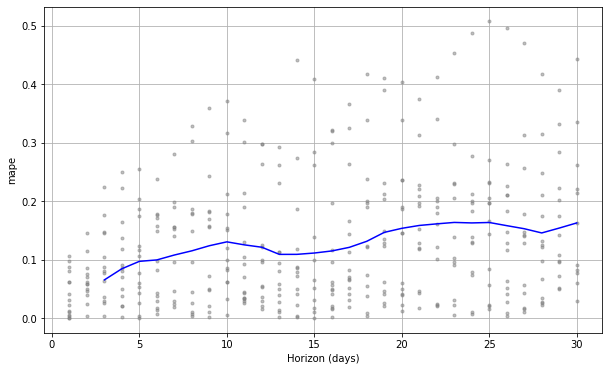

In [8]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mape')

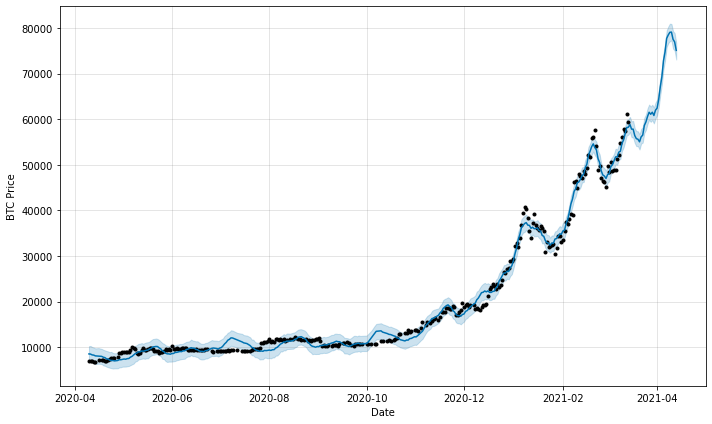

/Users/snezana/testenv/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/Users/snezana/testenv/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


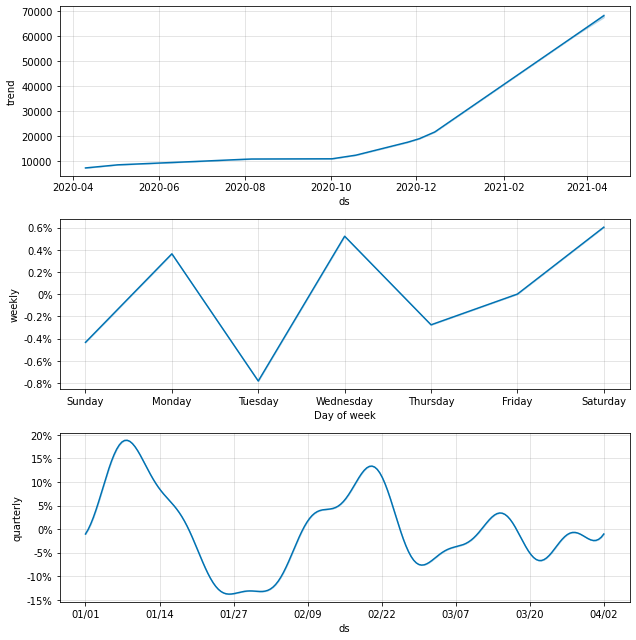

In [9]:
# Forecast for 1 month
fcast_time=30   
df_forecastb = pht.make_future_dataframe(periods= fcast_time, freq='D')

# Do forecasting
df_forecastb = pht.predict(df_forecastb)

#df_forecastb[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#df_forecastb.tail()

# Plot the forecast
pht.plot(df_forecastb, xlabel = 'Date', ylabel = 'BTC Price')
plt.show()

# Plot the components
fig = pht.plot_components(df_forecastb)
plt.show()

## Adding social media features

In [10]:
# Make a selection of extra regressors
variables = [
'tw_Retweet_Count_sum_last10_mean',
'tw_N_pos_last10_mean',
'tw_pos_sum_last10_mean',
'tw_N_last10_mean',
'tw_neg_sum_last10_mean',
'rd_Upvote_Ratio_sum_last5_mean', 
'rd_Num_Comments_sum_last10_mean',
'rd_N_neg_last10_mean'
]

# Define an extended prophet model
pht_ext = Prophet(
    #daily_seasonality=False, 
    seasonality_mode="multiplicative"
)

# Add regressors
for var in variables:
    pht_ext.add_regressor(var, mode="additive")
    
#fit the model
pht_ext.fit(df_ana)

# Cross validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(pht_ext, horizon = '30 days')

# Performance metrics from cross-validation
df_p = performance_metrics(df_cv)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 2020-07-17 00:00:00 and 2021-02-12 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

In [11]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-18,9489.715963,9103.737455,9872.333858,9159.040039,2020-07-17
1,2020-07-20,9330.080077,8955.099268,9700.861234,9164.231445,2020-07-17
2,2020-07-21,9309.415135,8938.508270,9687.822356,9374.887695,2020-07-17
3,2020-07-22,9194.478453,8829.893188,9553.901819,9525.363281,2020-07-17
4,2020-07-23,9032.614390,8686.895466,9400.437444,9581.072266,2020-07-17
...,...,...,...,...,...,...
396,2021-03-10,46193.364681,44415.659553,47726.468964,56008.550781,2021-02-12
397,2021-03-11,46212.633304,44674.716828,47596.698170,57805.121094,2021-02-12
398,2021-03-12,46860.825026,45238.594136,48452.485810,57332.089844,2021-02-12
399,2021-03-13,48913.751770,47327.333519,50514.950686,61243.085938,2021-02-12


In [12]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,3.257717e+06,1804.914791,1214.627293,0.054895,0.031824,0.560000
1,4 days,4.059846e+06,2014.906030,1328.573171,0.059894,0.035550,0.500000
2,5 days,4.945134e+06,2223.765784,1529.983551,0.070637,0.065842,0.413462
3,6 days,5.484634e+06,2341.929458,1674.569420,0.078643,0.066814,0.303571
4,7 days,7.452367e+06,2729.902410,1933.821721,0.087475,0.076709,0.250000
5,8 days,1.082465e+07,3290.083804,2221.478839,0.092645,0.078330,0.217857
6,9 days,1.629623e+07,4036.858622,2559.918972,0.099798,0.075979,0.235714
7,10 days,1.988647e+07,4459.425041,2702.652752,0.103796,0.071140,0.281250
8,11 days,1.935882e+07,4399.866426,2583.039333,0.104695,0.063232,0.288462
9,12 days,1.637417e+07,4046.501384,2421.484310,0.103272,0.071717,0.332143


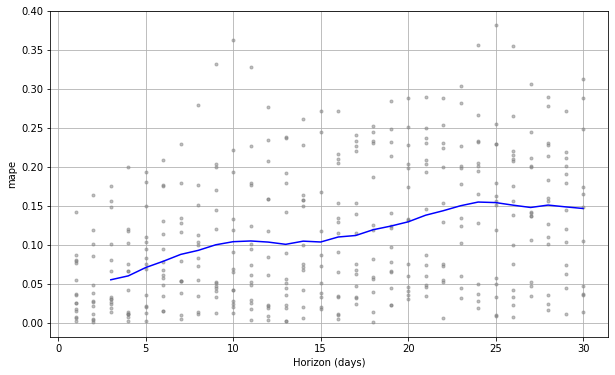

In [13]:
fig = plot_cross_validation_metric(df_cv, metric = 'mape')

In [ ]:
# Forecast for 1 month
fcast_time=30   
df_forecast_ext = pht_ext.make_future_dataframe(periods= fcast_time, freq='D')

# Do forecasting
df_forecast_ext = pht_ext.predict(df_forecast_ext)

#df_forecastb[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#df_forecastb.tail()

# Plot the forecast
pht.plot(df_forecast_ext, xlabel = 'Date', ylabel = 'BTC Price')
plt.show()

# Plot the components
fig = pht.plot_components(df_forecast_ext)
plt.show()

In [ ]:
list(df_ana.columns)

# Backup

In [ ]:
# Hyper-parameter tuning

import itertools
import numpy as np
import pandas as pd
from fbprophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_ana)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)